In [1]:
import numpy as np
import scipy.signal
from scipy.optimize import minimize
from datetime import datetime
from fur.one_data_set_analyzer import analyze_one_dataset
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7.5]
plt.rcParams.update({'font.size': 16,'legend.fontsize':16})
import seaborn as sns
import sys
import os
from fur.path_assistant import PathAssistant
shift = PathAssistant('shift_03_16_2020',
    ignore_files=['RefCurve_2020-03-16_0_084020_test.Wfm.bin'])
results_dir = shift.get_results_dir()
from fur.extending_with_acnet_data import get_fluctuations_df_with_acnet_data
fluctuations_df = get_fluctuations_df_with_acnet_data(
    shift,
    "res_df_comb_filter_no_nd_filters_ROUND_data_03_16_2020.csv",
    "IOTA_1NL_100MeV_v8.6.1.4.6ds_data.txt"
)
from config import get_from_config
res_df = fluctuations_df


In [2]:
fluctuations_df

,waveform_file,ch2_amplitude,var_of_ch1_amplitude,noise_var,file_datetime,rounded_bpm_file_datetime,N:IWCMI,N:IBEAMA,N:IWCMBE,N:IWCMBR,...,N:ITC2LSV,N:ITC1LSV,N:IWCMI_recalibrated_to_IWCMI_absolute,N:IBEAM_recalibrated_to_IWCMI_absolute,Sigma_um_X,Sigma_um_X_err,Sigma_um_Y,Sigma_um_Y_err,Angle_spread_rad_X,Angle_spread_rad_Y
0,RefCurve_2020-03-16_41_134824.Wfm.bin,0.622903,5.538821e-08,8.283681e-08,2020-03-16 13:48:24,2020-03-16 13:06:11,-2.021617,-1.850993,26.781082,29.044425,...,178.666305,526.462005,-1.788250,-1.789423,249.558211,inf,230.149735,85.784969,1.801701e+07,0.000181
1,RefCurve_2020-03-16_42_134847.Wfm.bin,0.600932,5.121395e-08,8.219146e-08,2020-03-16 13:48:47,2020-03-16 13:24:44,-3.004845,-2.728245,29.999293,32.415922,...,73.463303,143.077300,-2.657979,-2.637495,278.527100,inf,84.794264,23.729977,1.801701e+07,0.000067
2,RefCurve_2020-03-16_43_134911.Wfm.bin,0.579735,4.749272e-08,8.219419e-08,2020-03-16 13:49:11,2020-03-16 13:25:06,-2.889952,-2.629415,29.922572,32.333176,...,72.676201,138.576710,-2.556349,-2.541953,277.816127,inf,83.341714,23.035509,1.801701e+07,0.000066
3,RefCurve_2020-03-16_44_134935.Wfm.bin,0.561267,4.740209e-08,8.281608e-08,2020-03-16 13:49:35,2020-03-16 13:25:34,-2.752064,-2.508245,29.895756,32.367826,...,71.544296,133.097200,-2.434378,-2.424813,278.113847,inf,81.446989,22.186790,1.801701e+07,0.000064
4,RefCurve_2020-03-16_45_135000.Wfm.bin,0.536368,4.259902e-08,8.202102e-08,2020-03-16 13:50:00,2020-03-16 13:26:01,-2.626225,-2.393660,29.901546,32.384077,...,70.375000,128.287805,-2.323065,-2.314040,278.253482,inf,79.531561,21.397810,1.801701e+07,0.000063
5,RefCurve_2020-03-16_46_135029.Wfm.bin,0.518683,4.133832e-08,8.230840e-08,2020-03-16 13:50:29,2020-03-16 13:26:34,-2.477564,-2.270415,29.880250,32.368061,...,69.344200,124.202800,-2.191565,-2.194894,278.115869,inf,77.819182,20.715197,1.801701e+07,0.000061
6,RefCurve_2020-03-16_47_135056.Wfm.bin,0.502098,3.936126e-08,8.224015e-08,2020-03-16 13:50:56,2020-03-16 13:27:00,-2.369721,-2.172490,29.854117,32.324651,...,68.568100,121.657200,-2.096171,-2.100226,277.742872,inf,76.590450,20.259398,1.801701e+07,0.000060
7,RefCurve_2020-03-16_48_135121.Wfm.bin,0.485940,3.697039e-08,8.242915e-08,2020-03-16 13:51:21,2020-03-16 13:27:26,-2.267637,-2.082320,29.807656,32.376899,...,67.789902,118.520000,-2.005871,-2.013056,278.191802,inf,75.313648,19.750455,1.801701e+07,0.000059
8,RefCurve_2020-03-16_49_135145.Wfm.bin,0.468710,3.487690e-08,8.212960e-08,2020-03-16 13:51:45,2020-03-16 13:27:51,-2.171289,-2.001490,29.733728,32.263071,...,67.156349,116.097150,-1.920645,-1.934914,277.213764,inf,74.272078,19.328440,1.801701e+07,0.000058
9,RefCurve_2020-03-16_50_135212.Wfm.bin,0.454728,3.303546e-08,8.268496e-08,2020-03-16 13:52:12,2020-03-16 13:28:26,-2.046757,-1.890245,29.615563,32.110771,...,66.427101,112.635500,-1.810488,-1.827370,275.905154,inf,72.964685,18.779217,1.801701e+07,0.000057


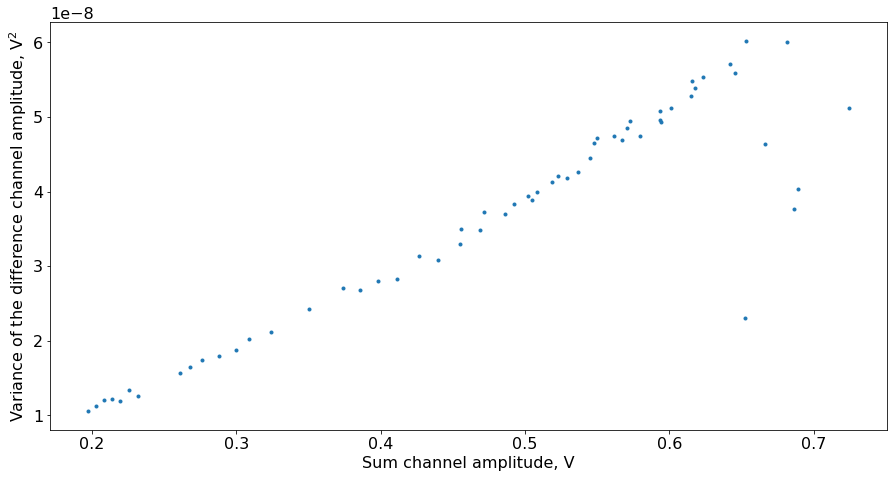

In [6]:
plt.plot(res_df["ch2_amplitude"],res_df["var_of_ch1_amplitude"] ,'.')
plt.xlabel("Sum channel amplitude, V")
plt.ylabel("Variance of the difference channel amplitude, V$^2$")
plt.show()

In [7]:
alpha = 1.6e-19/2e-12*np.sqrt(2)/4
alpha

2.8284271247461904e-08

In [8]:
reg = linear_model.LinearRegression(fit_intercept=False)
x1 = np.insert(res_df["ch2_amplitude"].values,0,0)
x2 = x1**2
y = np.insert(res_df["var_of_ch1_amplitude"].values,0,0)-alpha*x1
reg.fit(x2.reshape((len(x2), 1)), y)
a = reg.coef_[0]
Mf = np.sqrt(2)/(4*a)
Mf

4152178.85859722

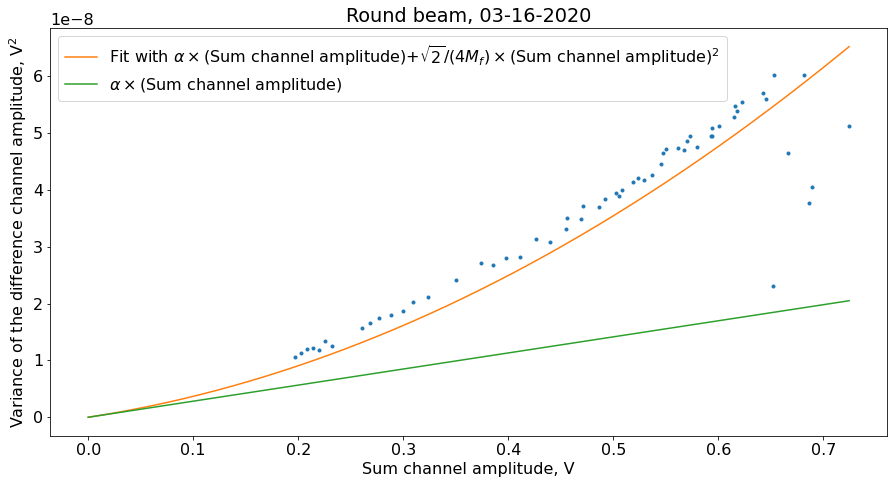

In [11]:
plt.plot(res_df["ch2_amplitude"],res_df["var_of_ch1_amplitude"] ,'.')
x_f = np.linspace(0,max(x1),1000)
plt.plot(x_f, alpha*x_f+a*x_f**2, label=r"Fit with $\alpha\times$(Sum channel amplitude)+$\sqrt{2}/(4M_f)\times$(Sum channel amplitude)$^2$")
plt.plot(x_f, alpha*x_f, label=r"$\alpha\times$(Sum channel amplitude)")
plt.xlabel("Sum channel amplitude, V")
plt.ylabel("Variance of the difference channel amplitude, V$^2$")
plt.title(r"Round beam, 03-16-2020")
plt.legend()
plt.savefig(results_dir.fi("comb_filter_no_nd_filters_ROUND_data_03_16_2020.pdf"), bbox_inches='tight')
plt.show()

$\alpha=\frac{\sqrt{2}e}{4 C_f}$,
it is the predicted slope for the quantum Poisson contribution. - This estimation doesn't take into account attenuation and dispersion in the cable yet. When they are taken into account the agreement might get even better.
$M_f$ is the numer of coherent modes, according to the least squares fit.

$M_f = 4.1\times 10^6$

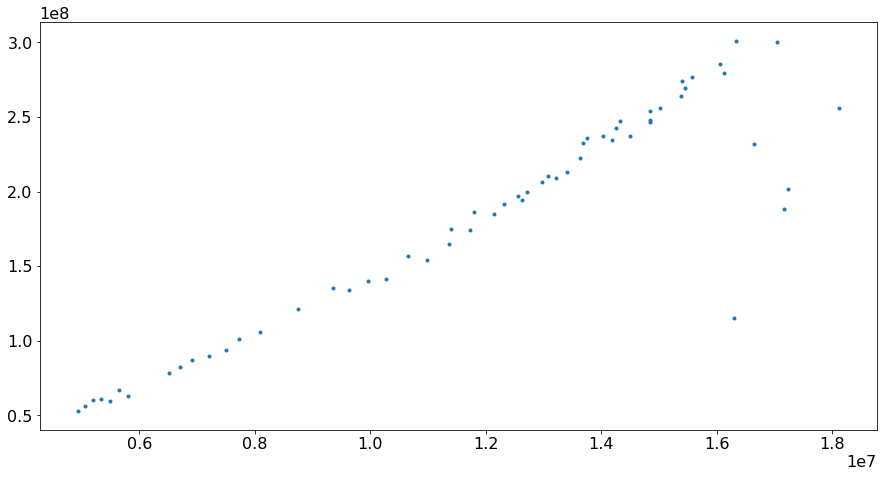

In [12]:
varN = 1/alpha**2*4*res_df["var_of_ch1_amplitude"].values
N = 1/alpha/np.sqrt(2)*res_df["ch2_amplitude"].values
plt.plot(N,varN,'.')
plt.show()